**Problem Statement: Analyzing Customer Churn in a Telecommunications Company**

Dataset: "Telecom_Customer_Churn.csv"
Description: The dataset contains information about customers of a telecommunications
company and whether they have churned (i.e., discontinued their services). The dataset
includes various attributes of the customers, such as their demographics, usage patterns, and
account information. The goal is to perform data cleaning and preparation to gain insights
into the factors that contribute to customer churn.
Tasks to Perform:
1. Import the "Telecom_Customer_Churn.csv" dataset.
2. Explore the dataset to understand its structure and content.
3. Handle missing values in the dataset, deciding on an appropriate strategy.
4. Remove any duplicate records from the dataset.
5. Check for inconsistent data, such as inconsistent formatting or spelling variations,
and standardize it.
6. Convert columns to the correct data types as needed.
7. Identify and handle outliers in the data.
8. Perform feature engineering, creating new features that may be relevant to
predicting customer churn.
9. Normalize or scale the data if necessary.
10. Split the dataset into training and testing sets for further analysis.
11. Export the cleaned dataset for future analysis or modeling

Import necessary libraries

In [1]:
import pandas as pd                 #data manipulation
import numpy as np                  #numerical computations
from sklearn.model_selection import train_test_split              # scikit-learn for machine learning models  split the dataset into training and testing sets for model evaluation
from sklearn import metrics                          #evaluating the performance of machine learning models

Load the dataset

In [2]:
data = pd.read_csv("Telco_Customer_Churn .csv")
print(data.index)

RangeIndex(start=0, stop=7043, step=1)


Explore the dataset

In [3]:
print(data)

      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1        

In [4]:
print(data.columns)

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [5]:
data.shape

(7043, 21)

In [6]:
print(data.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [7]:
print(data.tail())

      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
7038          Yes               Yes             DSL            Yes  ...   
7039          Yes               Yes     Fiber optic             No  ...   
7040           No  No phone service             DSL            Yes  ...   
7041          Yes               Yes     Fiber optic             No  ...   
7042          Yes                No     Fiber optic            Yes  ...   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
7038              Yes         Yes         Yes  

In [8]:
# to know unique values
data.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6530
Churn                  2
dtype: int64

Handle Missing Values

In [9]:
# data.isna().sum() is used to count the number of missing values (NaN values) in each column of a pandas DataFrame called data.
data.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [10]:
# isna() and isnull() are essentially the same method in Pandas, and they both return a boolean mask of the same shape as the input object, indicating where missing values (NaN or None) are present.
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Remove Duplicate Records

In [11]:
# Check the number of rows before removing duplicates
print("Number of rows before removing duplicates:", len(data))

Number of rows before removing duplicates: 7043


In [12]:
# Remove duplicate records
data_cleaned = data.drop_duplicates()

In [13]:
# Check the number of rows after removing duplicates
print("Number of rows after removing duplicates:", len(data_cleaned))

Number of rows after removing duplicates: 7043


In [14]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [15]:
#Measure of frequency destribution
unique, counts = np.unique(data['tenure'], return_counts=True)
print(unique, counts)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72] [ 11 613 238 200 176 133 110 131 123 119 116  99 117 109  76  99  80  87
  97  73  71  63  90  85  94  79  79  72  57  72  72  65  69  64  65  88
  50  65  59  56  64  70  65  65  51  61  74  68  64  66  68  68  80  70
  68  64  80  65  67  60  76  76  70  72  80  76  89  98 100  95 119 170
 362]


In [16]:
#Measure of frequency destribution
unique, counts = np.unique(data['MonthlyCharges'], return_counts=True)
print(unique, counts)

[ 18.25  18.4   18.55 ... 118.6  118.65 118.75] [1 1 1 ... 2 1 1]


In [17]:
#Measure of frequency destribution
unique, counts = np.unique(data['TotalCharges'], return_counts=True)
print(unique, counts)

[18.8  18.85 18.9  ...   nan   nan   nan] [1 2 1 ... 1 1 1]


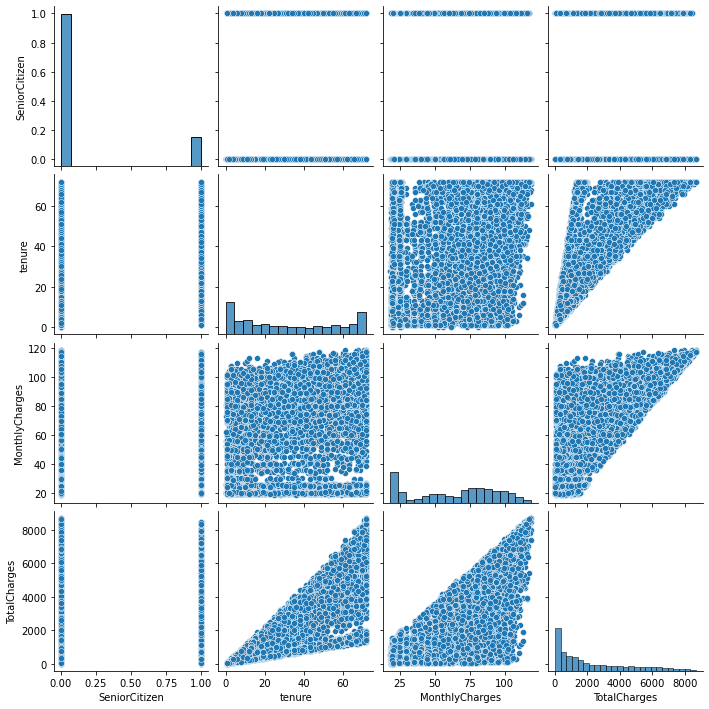

In [18]:
# sns.pairplot(data) creates a grid of pairwise plots of the variables in a dataset, which can help you quickly visualize the relationships between different pairs of variables.
import seaborn as sns        #Seaborn library for data visualization
sns.pairplot(data)

Check for Outliers

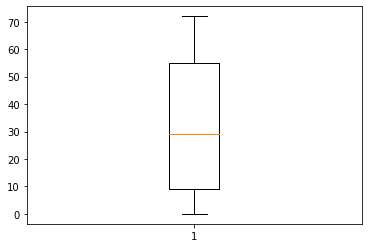

In [19]:
#checking boxplot for Fare column
import matplotlib.pyplot as plt              #pyplot module from the Matplotlib library
plt.boxplot(data['tenure'])
plt.show()

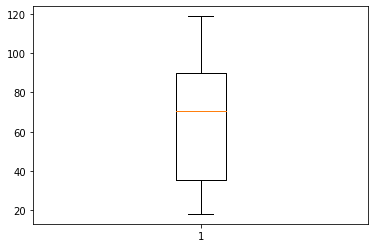

In [20]:
plt.boxplot(data['MonthlyCharges'])
plt.show()

Split the Data

In [21]:
X = data.drop("Churn", axis=1)
y = data["Churn"]
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [22]:
X_train.shape

(5634, 20)

In [23]:
y_train.shape

(5634,)

In [24]:
X_test.shape

(1409, 20)

In [25]:
X_test.shape

(1409,)

Export the cleaned data

In [26]:
# Export the cleaned dataset to a CSV file
data.to_csv("Cleaned_Telecom_Customer_Churn.csv", index=False)